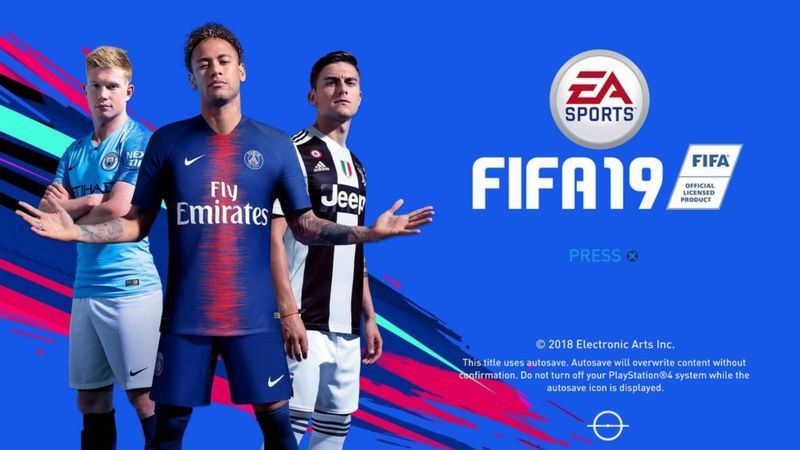

# What determines a player's Value?

This project will try to build a model that predicts a player's `Value`, using his attributes. It will also display feature importance to show which of those attributes play a key factor in his `Value`.

The dataset is from FIFA 2019. Explanatory variables includes the players' `Name`, `Age`, `International Reputation`, along with the position he plays, various rating on passing, tackling, shot power and stanima etc.

* At first, some of the traditional regression methods are used, the results were accpetable.

* Later on, **XGBRegressor** was used and it out-performed the traditonal method by a large margin.

## Load Libraries

In [55]:
import numpy as np 
import pandas as pd 

# graphics
import seaborn as sns
import matplotlib.pyplot as plt

# modeling
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [56]:
fifa19 = pd.read_csv('../input/fifa19/data.csv')

In [57]:
fifa19.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [58]:
fifa19

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [59]:
# take useful columns
col_name_full = list(fifa19.columns)
col_names = col_name_full[54:88] # crossing ~ GKReflexes
col_names = ['Value', 'Wage','Name', 'Age', 'Position', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Height', 'Weight', 'Overall', 'Potential'] + col_names
len(col_names)

fifa19 = fifa19[col_names]

## Change the following attribute to numerical

Right now these have special symbols attached to them:

* `Value`
* `Wage`
* `Height`
* `Weight`

In [60]:
# change value according to M/K
fifa19['Value'] = fifa19['Value'].apply(lambda x: x.replace('€',''))
fifa19['Value'] = (fifa19['Value'].replace(r'[KM]+$', '', regex=True).astype(float) * 
                   fifa19['Value'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
fifa19['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [61]:
# change wage according to M/K
fifa19['Wage'] = fifa19['Wage'].apply(lambda x: x.replace('€',''))
fifa19['Wage'] = (fifa19['Wage'].replace(r'[KM]+$', '', regex=True).astype(float) * 
                   fifa19['Wage'].str.extract(r'[\d\.]+([KM]+)', expand=False).fillna(1).replace(['K','M'], [10**3, 10**6]).astype(int))
fifa19['Wage']

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [62]:
# check missing value
fifa19.isnull().sum()

# drop missing value
fifa19.drop(fifa19[fifa19['International Reputation'].isnull()].index, axis=0, inplace=True)

# drop players with Value = 0
fifa19.drop(fifa19[fifa19['Value'] == 0].index, axis=0, inplace=True)

# no more missing value
fifa19.isnull().sum().sum()

0

In [63]:
# change Weight from object to float, remove 'lbs'
fifa19['Weight'] = fifa19['Weight'].astype(str)
fifa19['Weight'] = fifa19['Weight'].apply(lambda x: x.replace('lbs',''))
fifa19['Weight'] = fifa19['Weight'].apply(lambda x: float(x))


In [64]:
# change Weight from object to float, remove 'lbs'
def convert_weight(wt):
    foot = float(wt.split("'")[0])
    inch = float(wt.split("'")[1])
    
    return (foot*12 + inch)

fifa19['Height'] = fifa19['Height'].astype(str)
fifa19['Height'] = fifa19['Height'].apply(convert_weight)


## Heatmap

* Value and Wage are too closely correlated, in this project Wage will be excluded when building the model.

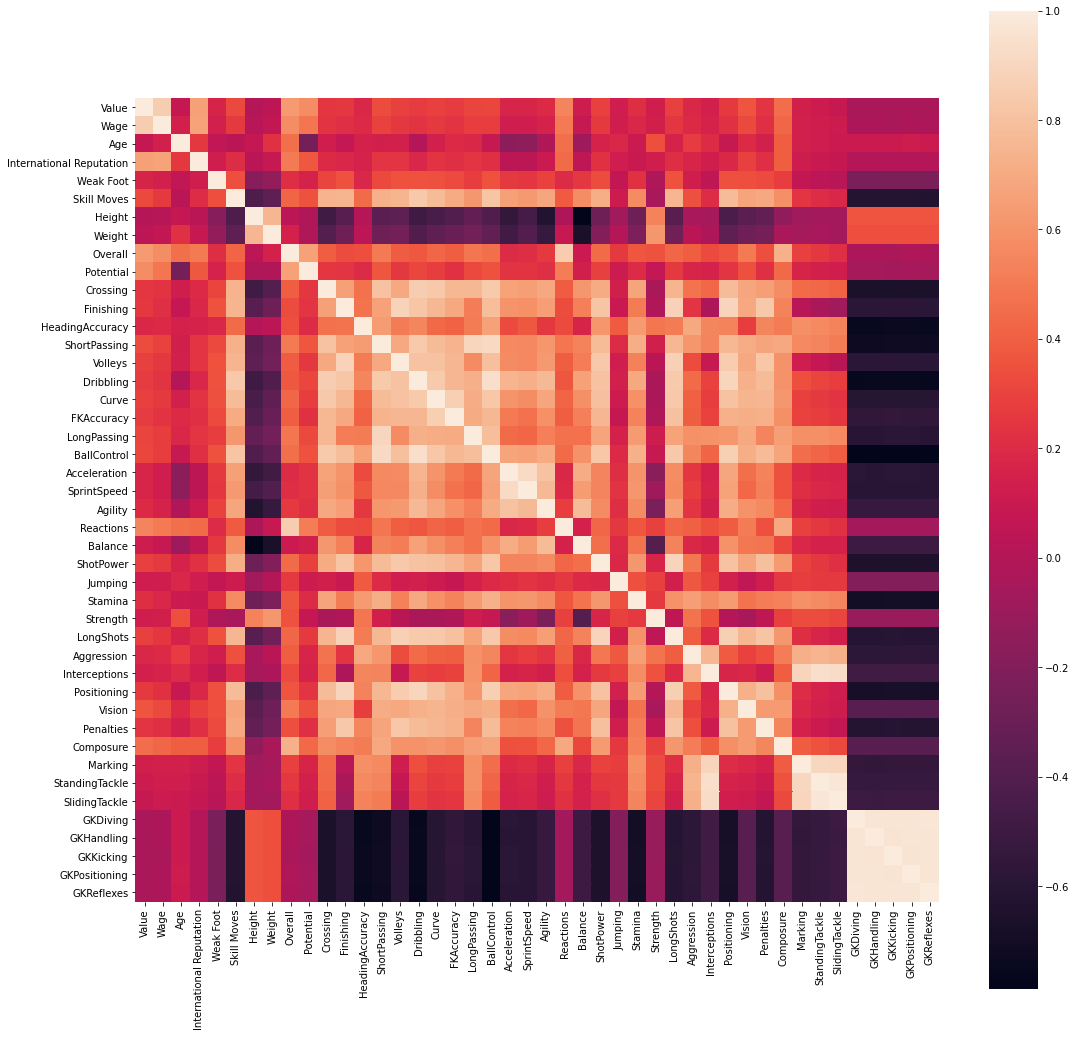

In [65]:
corr_mt = fifa19.corr()

plt.figure(figsize=(18,18))
sns.heatmap(corr_mt, square=True)
plt.show()

## Position of players

There are too many `Position` on the field, but after some reasearch, all `Position` can be grouped into four categories:
* Attacker
* Midfield
* Defender
* Goal Keeper

In [66]:
fifa19['Position'].value_counts()

ST     2130
GK     1989
CB     1751
CM     1377
LB     1304
RB     1268
RM     1114
LM     1086
CAM     946
CDM     936
RCB     652
LCB     635
LCM     389
RCM     387
LW      374
RW      365
RDM     246
LDM     239
LS      206
RS      201
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [67]:

Defense_men = ['RWB', 'LWB', 'RCB', 'LCB', 'RB', 'LB', 'CB']
Mid_fielder = ['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'LAM', 'RAM', 'RDM', 'LDM']
Front = ['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF']

fifa19['Position'].replace(Defense_men, 'Defender', inplace=True)
fifa19['Position'].replace(Mid_fielder, 'Midfield', inplace=True)
fifa19['Position'].replace(Front, 'Attacker', inplace=True)

In [68]:
fifa19['Position'].value_counts()

Midfield    6762
Defender    5775
Attacker    3381
GK          1989
Name: Position, dtype: int64

# Value is highly skewed, therefore taking log(Value)

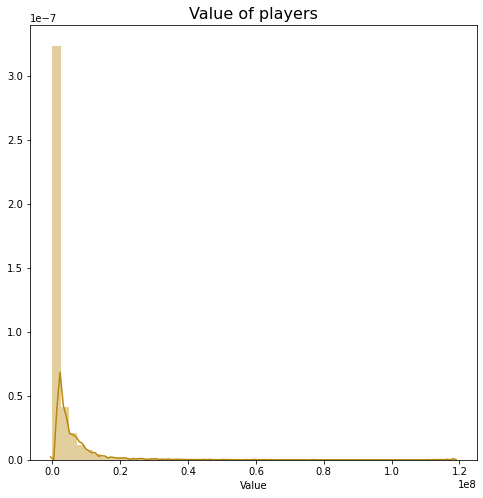

In [69]:
plt.figure(figsize=(8,8))
sns.distplot(fifa19['Value'], color='darkgoldenrod')
plt.title('Value of players', size=16)
plt.show()

## The Value of players at different position seems not differ by much

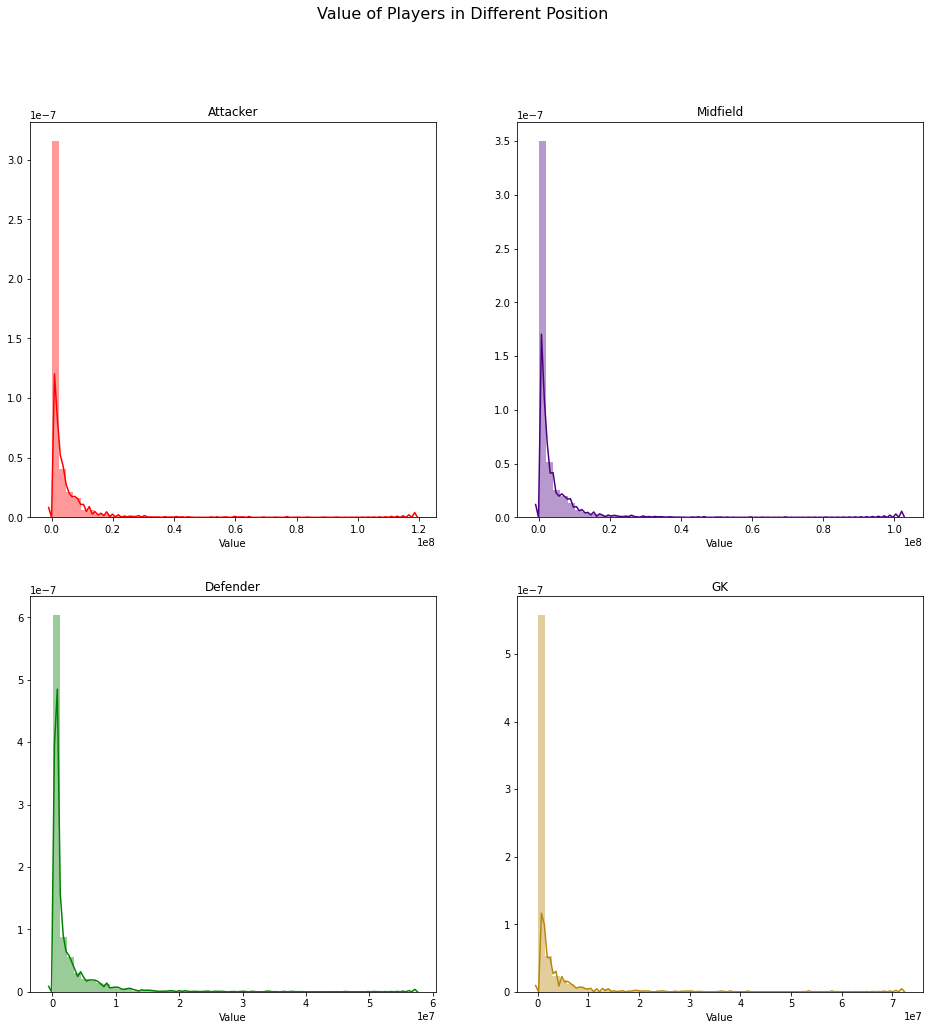

In [70]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

sns.distplot(fifa19[fifa19.Position == 'Attacker']['Value'], color='r', ax=ax[0,0])
ax[0,0].set_title('Attacker')

sns.distplot(fifa19[fifa19.Position == 'Midfield']['Value'], color='indigo', ax=ax[0,1])
ax[0,1].set_title('Midfield')

sns.distplot(fifa19[fifa19.Position == 'Defender']['Value'], color='g', ax=ax[1,0])
ax[1,0].set_title('Defender')

sns.distplot(fifa19[fifa19.Position == 'GK']['Value'], color='darkgoldenrod', ax=ax[1,1])
ax[1,1].set_title('GK')

fig.suptitle('Value of Players in Different Position', size=16)
plt.show()

## Values look much more centered after taking log

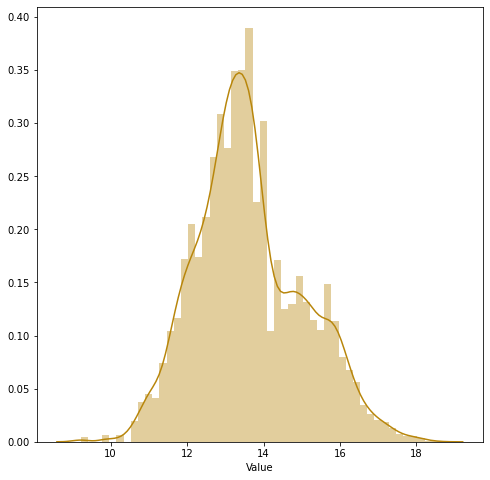

In [71]:
plt.figure(figsize=(8,8))
sns.distplot(np.log(fifa19['Value']), color='darkgoldenrod')
plt.show()

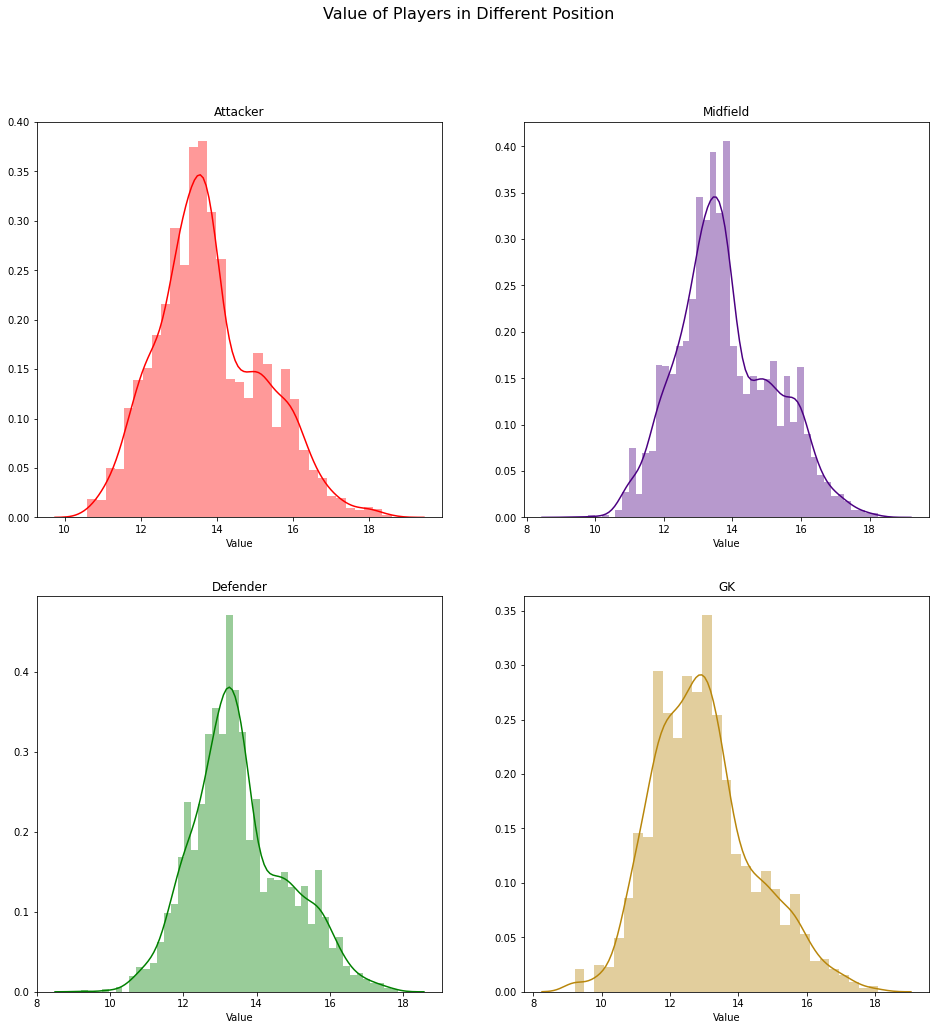

In [72]:
fig, ax = plt.subplots(2,2, figsize=(16,16))

sns.distplot(np.log(fifa19[fifa19.Position == 'Attacker']['Value']), color='r', ax=ax[0,0])
ax[0,0].set_title('Attacker')

sns.distplot(np.log(fifa19[fifa19.Position == 'Midfield']['Value']), color='indigo', ax=ax[0,1])
ax[0,1].set_title('Midfield')

sns.distplot(np.log(fifa19[fifa19.Position == 'Defender']['Value']), color='g', ax=ax[1,0])
ax[1,0].set_title('Defender')

sns.distplot(np.log(fifa19[fifa19.Position == 'GK']['Value']), color='darkgoldenrod', ax=ax[1,1])
ax[1,1].set_title('GK')

fig.suptitle('Value of Players in Different Position', size=16)
plt.show()

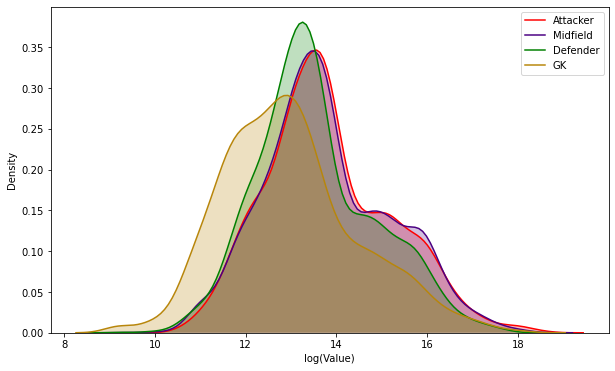

In [73]:
fig, ax = plt.subplots(figsize=(10,6))

sns.kdeplot(np.log(fifa19[fifa19.Position == 'Attacker']['Value']), shade=True, color="r", label="Attacker", ax=ax)
sns.kdeplot(np.log(fifa19[fifa19.Position == 'Midfield']['Value']), shade=True, color="indigo", label="Midfield", ax=ax)
sns.kdeplot(np.log(fifa19[fifa19.Position == 'Defender']['Value']), shade=True, color="g", label="Defender", ax=ax)
sns.kdeplot(np.log(fifa19[fifa19.Position == 'GK']['Value']), shade=True, color="darkgoldenrod", label="GK", ax=ax)

ax.set_xlabel("log(Value)")
ax.set_ylabel("Density")

plt.show()

## Distribution on Height and Weight

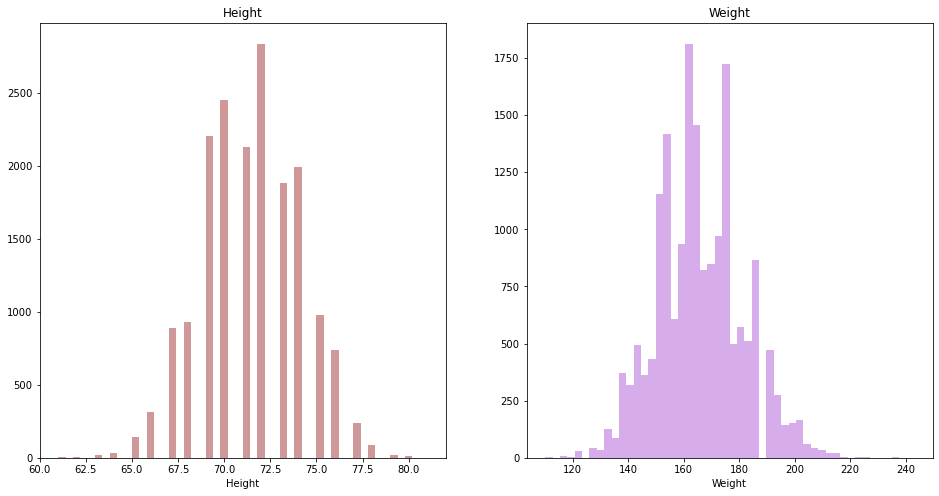

In [74]:
fig, ax = plt.subplots(1,2, figsize=(16,8))

sns.distplot(fifa19['Height'], kde=False, color='darkred', ax=ax[0])
ax[0].set_title('Height')

sns.distplot(fifa19['Weight'], kde=False, color='darkorchid',ax=ax[1])
ax[1].set_title('Weight')

plt.show()

## One hot transformation on Position

* Drop GK to avoid colinearity

In [75]:
fifa19['Position']

0        Attacker
1        Attacker
2        Attacker
3              GK
4        Midfield
           ...   
18202    Midfield
18203    Attacker
18204    Attacker
18205    Attacker
18206    Midfield
Name: Position, Length: 17907, dtype: object

In [76]:
# one hot, drop GK to avoid colinearity
one_hot_position = pd.get_dummies(fifa19['Position'].replace('GK', np.nan), prefix='Position')
fifa19 = pd.concat([fifa19, one_hot_position], axis=1)
fifa19.drop('Position', axis=1, inplace=True)

## Body Type
* There are some speical entries, where body-type = player-name
* After some reasearch, it could be intentional that they have special body-types, e.g. Messi is a lot stronger than players of his height. Ronaldo is more flexible compare to other players that are 6'2"
* 'PLAYER_BODY_TYPE_25' is M. Salah from Liverpool
* For now, assign them body-type of 'normal'

In [77]:
fifa19['Body Type'].value_counts()

Normal                 10428
Lean                    6349
Stocky                  1123
Shaqiri                    1
PLAYER_BODY_TYPE_25        1
Messi                      1
C. Ronaldo                 1
Courtois                   1
Akinfenwa                  1
Neymar                     1
Name: Body Type, dtype: int64

In [78]:
# fix body type
fifa19['Body Type'] = fifa19['Body Type'].replace(['Messi', 'C. Ronaldo', 'Neymar', 'Courtois', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa'], 'Normal')
fifa19['Body Type']

0        Normal
1        Normal
2        Normal
3          Lean
4        Normal
          ...  
18202      Lean
18203    Normal
18204    Normal
18205      Lean
18206      Lean
Name: Body Type, Length: 17907, dtype: object

In [79]:
# one hot body type
one_hot_body_type = pd.get_dummies(fifa19['Body Type'].replace('Normal', np.nan), prefix='Body_Type')
fifa19 = pd.concat([fifa19, one_hot_body_type], axis=1)
fifa19.drop('Body Type', axis=1, inplace=True)

## Work Rate

`Work Rate` determines how far a player is willing to leave his position to participate the game

* 'High' in defence WR for a defender means he will push far into the front to participate in offense
* 'Low' in denfence WR for an attacker means he will stay in front even the other team is attacking

Original data stores `Work Rate` in the formate of Offense/Defense in on column

* The code will separate out the WR, assign separate column for Offense and Defense
* Then it will replace Low, Medium, High with numerical values 1, 2, 3

In [80]:
# split 'Work Rate' into two values: attack / defense
work_rate_list = fifa19['Work Rate'].apply(lambda x: x.split('/ '))

# create new columns
fifa19['Attack_WR'] = work_rate_list.apply(lambda x: x[0])
fifa19['Defense_WR'] = work_rate_list.apply(lambda x: x[1])

# drop original 'Work Rate'
fifa19.drop('Work Rate', axis=1, inplace=True)

# reassign values, {'Low':1, 'Medium':2, 'High':3}
fifa19['Attack_WR'].replace({'Low':1, 'Medium':2, 'High':3}, inplace=True)
fifa19['Defense_WR'].replace({'Low':1, 'Medium':2, 'High':3}, inplace=True)

fifa19[['Attack_WR', 'Defense_WR']]

,Attack_WR,Defense_WR
0,2,2
1,3,1
2,3,2
3,2,2
4,3,3
...,...,...
18202,2,2
18203,2,2
18204,2,2
18205,2,2


# Model Fitting

Four regression Models are fitted:
* Ordinary Least Dquares
* Ridge Regression
* LASSO
* Elastic Net

All the models performed OK. <br>
The plot of true_value vs. predictions seemed a decent fit.<br><br>

But soon we will see **XGBoost** out performed them all.

In [81]:
fifa_data = fifa19.copy()
fifa_data.drop(['Wage', 'Name'], axis=1, inplace=True)
fifa_data['Value'] = np.log(fifa_data['Value'])

In [82]:
X = fifa_data.drop('Value', axis=1)
y = fifa_data['Value']

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 123)

print('train x:', train_x.shape)
print('train y:', train_y.shape)
print('valid x:', valid_x.shape)
print('valid y:', valid_y.shape)

train x: (12534, 49)
train y: (12534,)
valid x: (5373, 49)
valid y: (5373,)


### Ordinary Least Squares

MAE_train:  0.17493697416775025
MAE_valid:  0.17749188894309956


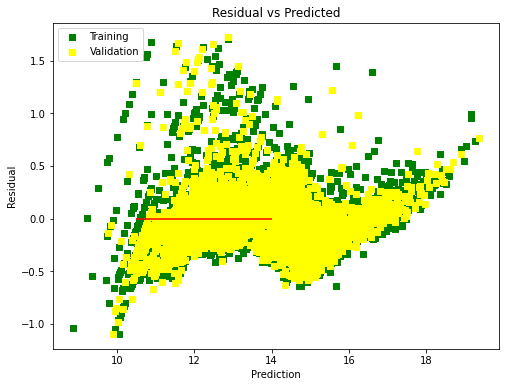

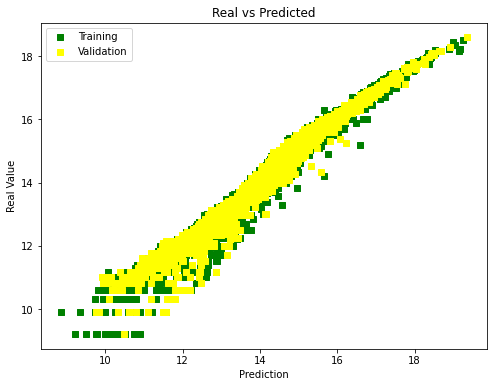

In [83]:
lr = LinearRegression()
lr.fit(train_x, train_y)

# print errors
train_y_pred = lr.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = lr.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

#residual plot
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y_pred-train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y_pred-valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Residual vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color='red')
plt.show()

#real vs predicted
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Real vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.legend(loc = 'upper left')
plt.show()

### Ridge Regression

Start Round 1
Best alpha Round 1: 30.0
Start Round 2
Best alpha Round 2: 25.5
MAE_train:  0.1749558702222291
MAE_valid:  0.17746893779892509


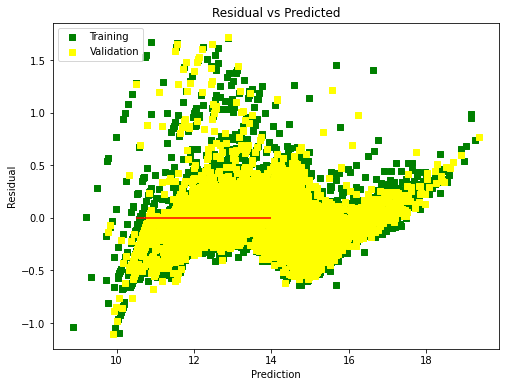

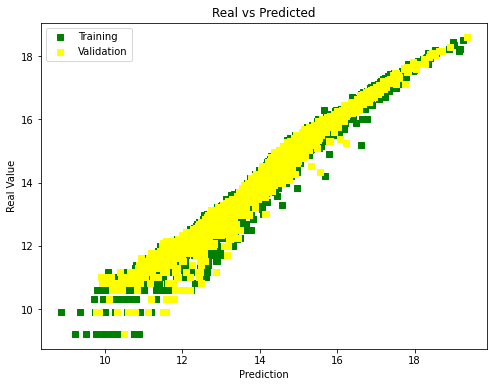

In [84]:
print("Start Round 1")
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(train_x, train_y)
alpha = ridge.alpha_
print("Best alpha Round 1:", alpha)

print("Start Round 2")
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)
ridge.fit(train_x, train_y)
alpha = ridge.alpha_
print("Best alpha Round 2:", alpha)

ridge = Ridge(alpha=alpha)
ridge.fit(train_x, train_y)

# print errors
train_y_pred = ridge.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = ridge.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

#residual plot
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y_pred-train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y_pred-valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Residual vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color='red')
plt.show()

#real vs predicted
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Real vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.legend(loc = 'upper left')
plt.show()

In [85]:
# ridge.coef_
# np.where(ridge.coef_ > 2.20570045e-01)

### LASSO Regression

Start Round 1
Best alpha Round 1: 0.01
Start Round 2
Best alpha Round 2: 0.006
MAE_train:  0.1757472834427481
MAE_valid:  0.17785029711320952


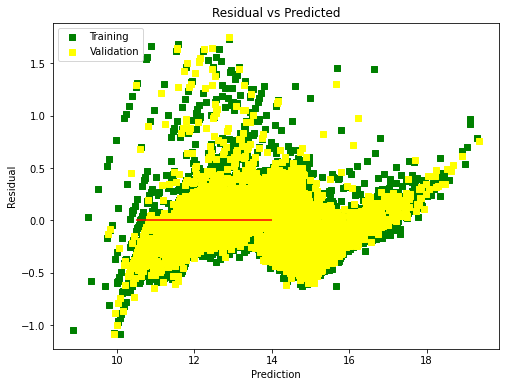

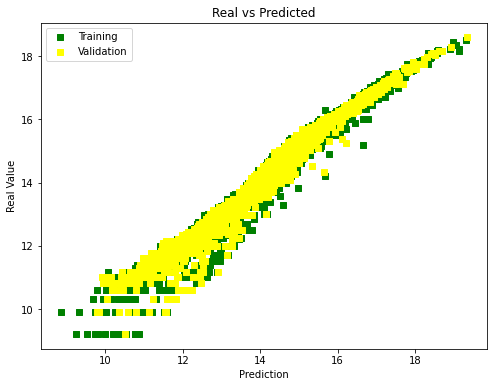

In [86]:
print("Start Round 1")
lasso = LassoCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
lasso.fit(train_x, train_y)
alpha = lasso.alpha_
print("Best alpha Round 1:", alpha)

print("Start Round 2")
lasso = LassoCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], cv = 10)
lasso.fit(train_x, train_y)
alpha = lasso.alpha_
print("Best alpha Round 2:", alpha)

lasso = Lasso(alpha=alpha)
lasso.fit(train_x, train_y)

# print errors
train_y_pred = lasso.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = lasso.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

#residual plot
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y_pred-train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y_pred-valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Residual vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color='red')
plt.show()

#real vs predicted
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Real vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.legend(loc = 'upper left')
plt.show()

### Elastic Net

Best alpha Round 1: 1.0
MAE_train:  0.24287168917775181
MAE_valid:  0.24653478810020718


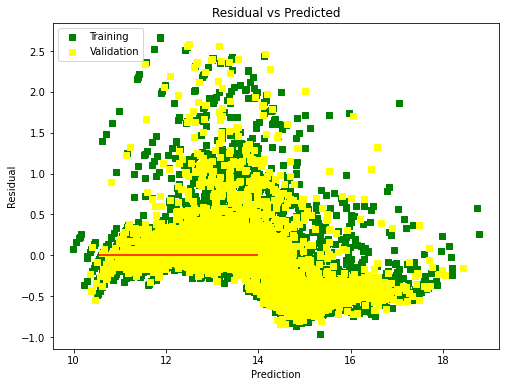

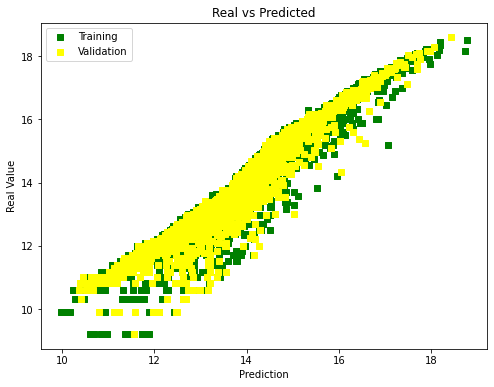

In [87]:
l1_ratio = [.1, .5, .7, .9, .95, .99, 1]

enet = ElasticNetCV(l1_ratio=l1_ratio)
enet.fit(train_x, train_y)
best_ratio = enet.l1_ratio_
print("Best alpha Round 1:", best_ratio)


enet = ElasticNet(l1_ratio=best_ratio)
enet.fit(train_x, train_y)

# print errors
train_y_pred = enet.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = enet.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

#residual plot
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y_pred-train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y_pred-valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Residual vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color='red')
plt.show()

#real vs predicted
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Real vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.legend(loc = 'upper left')
plt.show()

### XGBoost

The basic model already out-performs all the traditional regression models above. With:

* mean absolute error on training set = 0.0254
* mean absolute error on testing set = 0.0473

In [88]:
xgb_model = XGBRegressor(n_estimators = 100 , random_state = 50)
xgb_model.fit(train_x, train_y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=50,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
# print errors
train_y_pred = xgb_model.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = xgb_model.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

MAE_train:  0.02536156163991279
MAE_valid:  0.04734808475285998


## XGBoost Hyperparameter Tuning

### Tune NO. of estimator

the graph is pretty flat after n_estimator = 200

best cv score: -0.04944126552394347 {'n_estimators': 350}
-0.052880, (0.001012),{'n_estimators': 50}
-0.050039, (0.001143),{'n_estimators': 100}
-0.049612, (0.001009),{'n_estimators': 150}
-0.049464, (0.000982),{'n_estimators': 200}
-0.049475, (0.001017),{'n_estimators': 250}
-0.049462, (0.000989),{'n_estimators': 300}
-0.049441, (0.001023),{'n_estimators': 350}


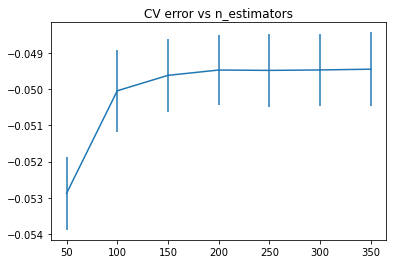

In [90]:
# tune n_estimator

model = XGBRegressor(eval_metric='mae')

# n_estimators : 50 ~ 400
n_estimators = range(50, 400, 50)
param = dict(n_estimators = n_estimators)
grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
grid_result = grid_search.fit(train_x, train_y)

print('best cv score:', grid_result.best_score_, grid_result.best_params_)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('%f, (%f),%r' % (mean, std, param))

plt.errorbar(n_estimators, means, yerr=stds)
plt.title('CV error vs n_estimators')
plt.show()


### Tune Learning Rate

best cv score: -0.041570600716031705 {'learning_rate': 0.1}

best cv score: -0.041570600716031705 {'learning_rate': 0.1}
-10.750665, (0.018382),{'learning_rate': 0.001}
-4.823985, (0.009232),{'learning_rate': 0.005}
-1.764892, (0.004263),{'learning_rate': 0.01}
-0.042339, (0.000544),{'learning_rate': 0.05}
-0.041571, (0.000654),{'learning_rate': 0.1}
-0.043977, (0.001096),{'learning_rate': 0.2}
-0.049464, (0.000982),{'learning_rate': 0.3}


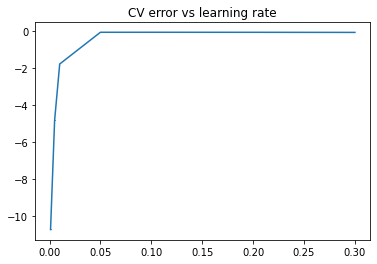

In [91]:
# tune learning rate

model = XGBRegressor(n_estimators=200, eval_metric='mae')

# learning rate
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.3]
param = dict(learning_rate = learning_rate)
grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
grid_result = grid_search.fit(train_x, train_y)

print('best cv score:', grid_result.best_score_, grid_result.best_params_)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('%f, (%f),%r' % (mean, std, param))

plt.errorbar(learning_rate, means, yerr=stds)
plt.title('CV error vs learning rate')
plt.show()

### Search for best combination of n_estimator and learning_rate

best cv score: -0.04070198596075532 {'learning_rate': 0.1, 'n_estimators': 300}

In [92]:
# # tune learning rate

# model = XGBRegressor(eval_metric='mae')


# # learning rate and n_estimator
# learning_rate = [0.05, 0.08, 0.1, 0.12, 0.15]
# n_estimators = [100, 150, 200, 250, 300]
# param = dict(learning_rate = learning_rate, n_estimators=n_estimators)
# grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
# grid_result = grid_search.fit(train_x, train_y)

# print('best cv score:', grid_result.best_score_, grid_result.best_params_)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, std, param in zip(means, stds, params):
#     print('%f, (%f),%r' % (mean, std, param))

# plt.errorbar(learning_rate, means, yerr=stds)
# plt.title('CV error vs learning rate')
# plt.show()

### Tune max_depth
best cv score: -0.03992976590469692 {'max_depth': 8}

In [93]:
# # max_depth

# model = XGBRegressor(n_estimators=300, learning_rate=0.1)

# max_depth = [6, 7, 8, 9, 10]
# param = dict(max_depth = max_depth)
# grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
# grid_result = grid_search.fit(train_x, train_y)

# print('best cv score:', grid_result.best_score_, grid_result.best_params_)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, std, param in zip(means, stds, params):
#     print('%f, (%f),%r' % (mean, std, param))

### Tuning Stochastic Gradient Boosting
### row subsampling

best cv score: -0.04070198596075532 {'subsample': 1.0}

using all rows

In [94]:
# # subsample

# model = XGBRegressor(n_estimators=300, learning_rate=0.1)

# subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
# param = dict(subsample = subsample)
# grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
# grid_result = grid_search.fit(train_x, train_y)

# print('best cv score:', grid_result.best_score_, grid_result.best_params_)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, std, param in zip(means, stds, params):
#     print('%f, (%f),%r' % (mean, std, param))

### column subsampling before creating a tree

best cv score: -0.04070198596075532 {'colsample_bytree': 1.0}

using full columns

In [95]:
# # colsample_bytree

# model = XGBRegressor(n_estimators=300, learning_rate=0.1)

# colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
# param = dict(colsample_bytree = colsample_bytree)
# grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
# grid_result = grid_search.fit(train_x, train_y)

# print('best cv score:', grid_result.best_score_, grid_result.best_params_)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, std, param in zip(means, stds, params):
#     print('%f, (%f),%r' % (mean, std, param))

### column subsampling for each split in a tree

best cv score: -0.04070198596075532 {'colsample_bylevel': 1.0}

In [96]:
# # colsample_bylevel

# model = XGBRegressor(n_estimators=300, learning_rate=0.1)

# colsample_bylevel = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# param = dict(colsample_bylevel = colsample_bylevel)
# grid_search = GridSearchCV(model, param, scoring='neg_mean_absolute_error', n_jobs = -1, cv=5)
# grid_result = grid_search.fit(train_x, train_y)

# print('best cv score:', grid_result.best_score_, grid_result.best_params_)

# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']

# for mean, std, param in zip(means, stds, params):
#     print('%f, (%f),%r' % (mean, std, param))

### Fitting final model

* n_estimataor = 300
* learning_rate = 0.1
* max_depth = 8

### The result is better than before tuning

### Before:
MAE_train:  0.02536156163991279 <br>
MAE_valid:  0.04734808475285998

### After
MAE_train:  0.008882759918053653 <br>
MAE_valid:  0.0384808490986644

The residual plot and true vs. predicted plot are also much better.

In [97]:
#            
xgb_model = XGBRegressor(n_estimators = 300 , random_state = 50, learning_rate=0.1, max_depth=8)
xgb_model.fit(train_x, train_y)

# print errors
train_y_pred = xgb_model.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = xgb_model.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

MAE_train:  0.008882759918053653
MAE_valid:  0.0384808490986644


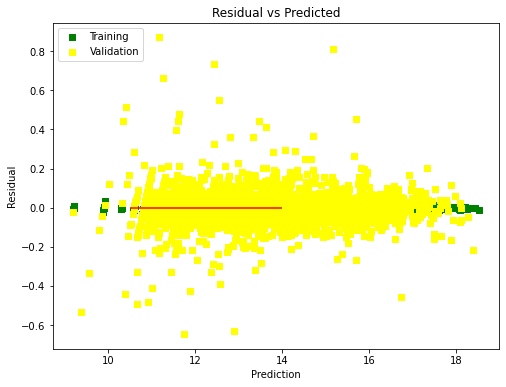

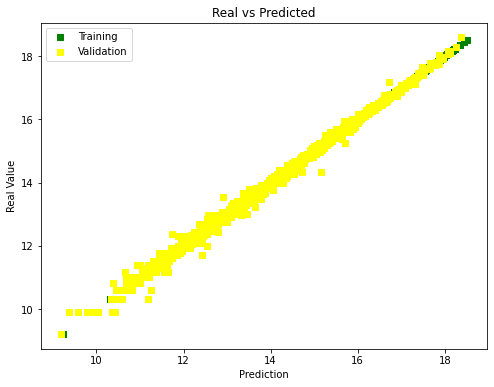

In [98]:
#residual plot
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y_pred-train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y_pred-valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Residual vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = 10.5, xmax = 14, color='red')
plt.show()

#real vs predicted
plt.figure(figsize=(8,6))
plt.scatter(x=train_y_pred,y=train_y, c = 'green', marker='s', label='Training')
plt.scatter(x=valid_y_pred,y=valid_y, c = 'yellow', marker='s', label='Validation')
plt.title('Real vs Predicted')
plt.xlabel('Prediction')
plt.ylabel('Real Value')
plt.legend(loc = 'upper left')
plt.show()

# Feature Importance

### The top 3 attribute that determines a player's value are:
* Overall
* Potential
* Age

But this isn't quite satisfying. Since `Overall` and `Potential` are vague terms, `Overall` is likely made up of all the attributes that belongs to a player.<br>

Therefore, I will try remove `Overall` and `Potential` from the model, and see whether this will give a more clear indication of important attributes of a player.


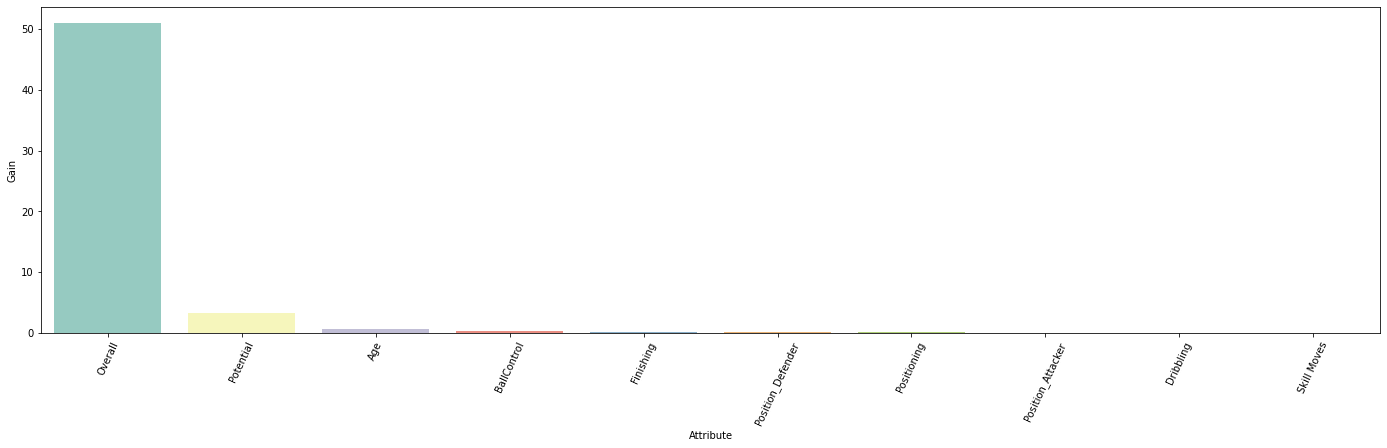

In [99]:
# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
imp = xgb_model.get_booster().get_score(importance_type='gain')

keys = imp.keys()
values = imp.values()

imp_df = pd.DataFrame({'Attribute':list(keys), 'Gain':list(values)})
imp_df.sort_values(by='Gain', ascending=False, inplace=True)

plt.figure(figsize=(24,6))
p = sns.barplot(data=imp_df.iloc[0:10], x='Attribute', y='Gain', palette='Set3')

plt.xticks(rotation=65)
plt.show()

## After removing "Overall" and "Potential":

Now the top 5 attributes are：
* Reactions
* Ball Control
* Composure
* Tackle
* Short Passing

All these are fundamental skills of a soccer player, we see on TV from time to time training footages of soccer players, and quite often they are indeed doing those basic training.<br>

Interestingly, `International Reputation`, `Age`, `Height` and `Weight` did not play a big part, neither do which `Position` of the player on the field.

In [100]:
X = fifa_data.drop(['Value', 'Overall', 'Potential'], axis=1)
y = fifa_data['Value']

train_x, valid_x, train_y, valid_y = train_test_split(X, y, test_size = 0.3, random_state = 123)

print('train x:', train_x.shape)
print('train y:', train_y.shape)
print('valid x:', valid_x.shape)
print('valid y:', valid_y.shape)

train x: (12534, 47)
train y: (12534,)
valid x: (5373, 47)
valid y: (5373,)


In [101]:
#            
xgb_model = XGBRegressor(n_estimators = 300 , random_state = 50, learning_rate=0.1, max_depth=8)
xgb_model.fit(train_x, train_y)

# print errors
train_y_pred = xgb_model.predict(train_x)
MAE_train = mean_absolute_error(train_y, train_y_pred)
print('MAE_train: ', MAE_train)

valid_y_pred = xgb_model.predict(valid_x)
MAE_valid = mean_absolute_error(valid_y, valid_y_pred)
print('MAE_valid: ', MAE_valid)

MAE_train:  0.03768508593947295
MAE_valid:  0.19244889328940454


In [102]:
imp_df

,Attribute,Gain
0,Overall,51.017526
2,Potential,3.332035
1,Age,0.728569
5,BallControl,0.390140
3,Finishing,0.224399
13,Position_Defender,0.185273
6,Positioning,0.134376
45,Position_Attacker,0.097238
10,Dribbling,0.058756
21,Skill Moves,0.040951


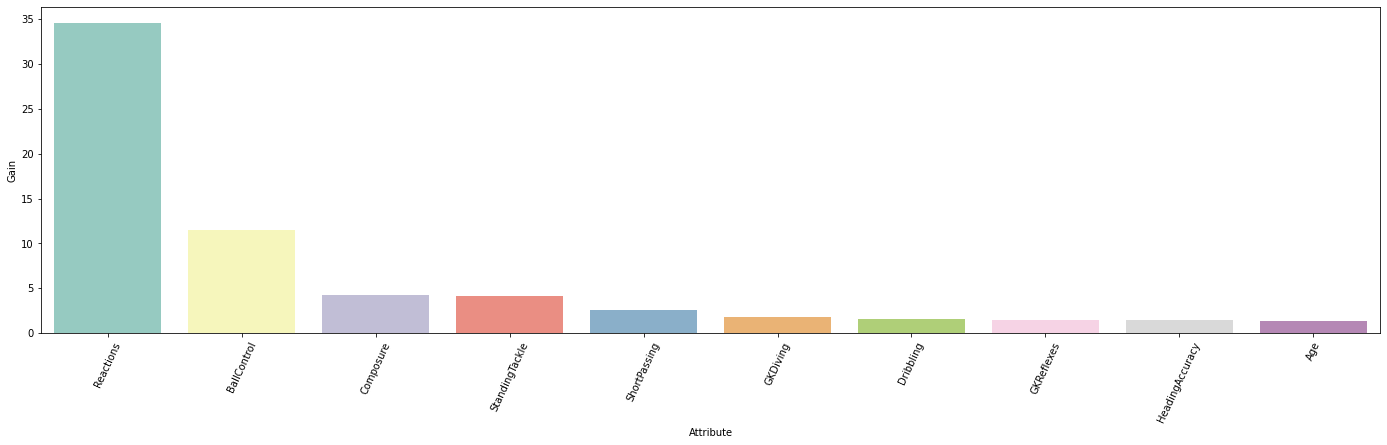

In [103]:
# importance_type = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
imp = xgb_model.get_booster().get_score(importance_type='gain')

keys = imp.keys()
values = imp.values()

imp_df = pd.DataFrame({'Attribute':list(keys), 'Gain':list(values)})
imp_df.sort_values(by='Gain', ascending=False, inplace=True)

plt.figure(figsize=(24,6))
p = sns.barplot(data=imp_df.iloc[0:10], x='Attribute', y='Gain', palette='Set3')

plt.xticks(rotation=65)
plt.show()